In [50]:
import pandas as pd
import plotly.express as px
import glob
import os
import plotly.graph_objects as go
import numpy as np 
import matplotlib.pyplot as plt

In [95]:
path = "/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230306split_index"
df_list = glob.glob(f"{path}/*/05.count*/*_clonetypes.csv")
sample_list = [i.split('/')[-1].split('_')[0] for i in df_list]
df_list = sorted(df_list, key=lambda x: int(x.split('/')[-1].split('_')[0].split("index")[-1].rstrip('K')))
sample_list = sorted(sample_list, key=lambda x: int(x.split('index')[-1].rstrip('K')))
sample_list = [f"index_{i.split('index')[-1].rstrip('K')}" for i in sample_list]
        

In [88]:
number_list = [pd.read_csv(df).shape[0] for df in df_list]

In [89]:
df = pd.DataFrame({"sample":sample_list, "clonotypes": number_list})

In [90]:
df

,sample,clonotypes
0,index_1,39
1,index_2,76
2,index_3,107
3,index_4,119
4,index_5,96
...,...,...
91,index_92,83
92,index_93,139
93,index_94,159
94,index_95,162


In [55]:
df["sample"]=  df["sample"].apply(lambda x: x.replace("R230228018",''))

In [56]:
df["sample"]=  df["sample"].apply(lambda x: x.replace('K',''))

In [57]:
df["index"] = df["sample"].apply(lambda x: int(x.replace("index", '')))

In [70]:
df["clonotypes"] = df["clonotypes"].astype(int)

In [60]:
df = df.reset_index()
del df["index"]

In [91]:
z = list(df.clonotypes)

In [92]:
z = [z[:8],
     z[8:16],
     z[16:24],
     z[24:32],
     z[32:40],
     z[40:48],
     z[48:56],
     z[56:64],
     z[64:72],
     z[72:80],
     z[80:88],
     z[88:]]

In [93]:
z

[[39, 76, 107, 119, 96, 25, 107, 178],
 [41, 221, 51, 96, 174, 143, 110, 77],
 [143, 105, 65, 228, 209, 131, 183, 144],
 [47, 201, 260, 148, 162, 132, 115, 169],
 [67, 307, 244, 188, 147, 105, 175, 180],
 [42, 63, 58, 134, 150, 154, 193, 132],
 [38, 83, 97, 147, 187, 182, 332, 135],
 [37, 136, 103, 126, 125, 115, 144, 148],
 [99, 257, 194, 124, 253, 198, 275, 106],
 [214, 106, 173, 97, 210, 160, 145, 77],
 [240, 306, 130, 104, 503, 215, 164, 90],
 [219, 112, 209, 83, 139, 159, 162, 59]]

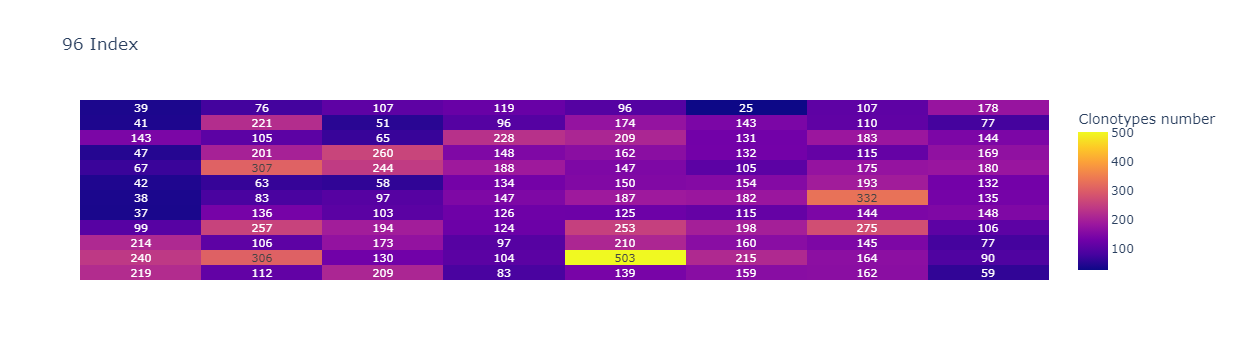

In [94]:
fig = px.imshow(z, text_auto=True, aspect="auto", title="96 Index", labels=dict(color="Clonotypes number"), )
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()
# fig.write_image("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230306split_index/plot/heatmap.pdf")

In [ ]:
df

In [103]:
import seaborn as sns

In [ ]:
path = "/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230306split_index"
df_list = glob.glob(f"{path}/*/05.count*/*_clonetypes.csv")
sample_list = [i.split('/')[-1].split('_')[0] for i in df_list]

In [ ]:
sample_list[0]

In [ ]:
df_list[0]

In [ ]:
df_list = sorted(df_list, key=lambda x: int(x.split('/')[-1].split('_')[0].split("index")[-1].rstrip('K')))

In [ ]:
sample_list = sorted(sample_list, key=lambda x: int(x.split('index')[-1].rstrip('K')))
sample_list = [f"index_{i.split('index')[-1].rstrip('K')}" for i in sample_list]

In [106]:
# 读入96个clonotype.csv文件并合并成一个数据框
dfs = []
for i in range(len(df_list)):
    df = pd.read_csv(df_list[i])
    df["Sample"] = sample_list[i]
    dfs.append(df)
#df_all = pd.concat(df_list)

In [107]:
#dfs

In [108]:
df_all = pd.concat(dfs)

In [111]:
df_all

,ClonotypeID,aaSeqCDR3,Frequency,Proportion,Sample
0,1,TRB:CSARDNLPQFSEQYF,46,9.87%,index_1
1,2,TRA:CAGRVTNAGKSTF,43,9.23%,index_1
2,3,TRA:CAMREGETSYDKVIF,34,7.3%,index_1
3,4,TRA:CALDISDMRF,32,6.87%,index_1
4,5,TRB:CASSPTDQGNQPQHF,32,6.87%,index_1
...,...,...,...,...,...
54,55,TRB:CASSLKPPGQGNNEEFF,1,0.12%,index_96
55,56,TRB:CASSLNIDNYGYTF,1,0.12%,index_96
56,57,TRA:CAMRGLHGSGNTGKLIF,1,0.12%,index_96
57,58,TRB:CASSLRPRTETGELFX,1,0.12%,index_96


In [100]:
pivot_table = df_all.pivot_table(index="ClonotypeID", columns="Sample", values="Frequency")

In [101]:
pivot_table = pivot_table.reindex(columns=sample_list)

In [146]:
np.percentile(np.array(pivot_table),[25,50,75])

array([nan, nan, nan])

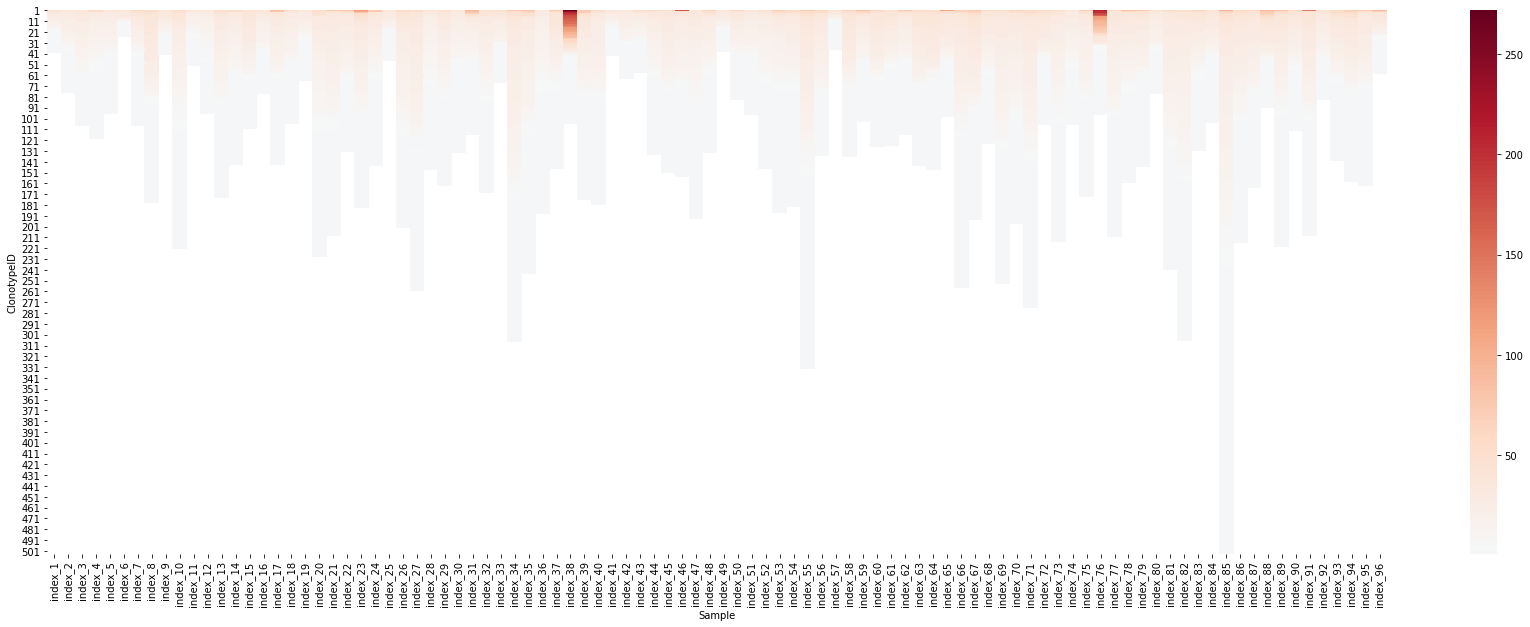

In [154]:
f, ax = plt.subplots(figsize=(30, 10))
ax = sns.heatmap(pivot_table, cmap="RdBu_r", center=50)
#plt.savefig('/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230306split_index/plot/bar.pdf', dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# 将数据框转换成透视表，其中每一行代表一个克隆型，每一列代表一个样本
pivot_table = df_all.pivot_table(index="aaSeqCDR3", columns="Sample", values="Frequency")

# 计算每对样本之间的共享克隆型
shared_clones = {}
for i, col1 in enumerate(pivot_table.columns):
    for j, col2 in enumerate(pivot_table.columns):
        if i < j:
            shared_clones[(col1, col2)] = set(pivot_table[pivot_table[col1] > 0].index) & set(pivot_table[pivot_table[col2] > 0].index)

# 构建网络图
G = nx.Graph()
for (col1, col2), clones in shared_clones.items():
    if len(clones) > 0:
        G.add_edge(col1, col2, weight=len(clones))

# 绘制网络图
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, width=[d["weight"]/50 for (u, v, d) in G.edges(data=True)])
nx.draw_networkx_labels(G, pos, font_size=8)
plt.axis("off")
plt.savefig('/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230306split_index/plot/net.pdf', dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
pivot_table = df_all.pivot_table(index="ClonotypeID", columns="Sample", values="Frequency")

In [ ]:
pivot_table = pivot_table.fillna(0)

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(pivot_table.values)
df_tsne = pd.DataFrame(tsne_result, columns=["t-SNE1", "t-SNE2"])
plt.scatter(df_tsne["t-SNE1"], df_tsne["t-SNE2"])

plt.show()

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(pivot_table.values)
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"])
plt.scatter(df_pca["PC1"], df_pca["PC2"])